<center>
    
    COMP4240/5435 - Reinforcement Learning
    
# Homework 4 - Monte Carlo Methods
    
</center>

Student Name: ____Harshal Dafade____

The purpose of this project is to study different properties of Monte Carlo methods.  

**General Notes:**
- Questions marked with * are optional for COMP4240 - Undergraduate section. Questions marked as extra credit are optional for everyone. This homework does not include a separate extra credit question. However, students in COMP4240 can gain some extra credits by solving the last part.
- Do not use a mix of python lists and numpy arrays. Every vector or matrix in your code should be a numpy array. 
- For functions that exist in both the python core and the numpy library, use the one in the numpy library. For example, use `np.max` instead of `max`. Another example: use `np.random.normal` instead of `random.gauss`.
- Make sure all of your plots have a proper size and include `xlabel`, `ylabel`, `legend`, `title`, and `grid`.

In order to use the Blackjack environment for this homework, you should install two python modules.

**Pygame**

Install this module using:
> pip install pygame

**OpenAI gym**
Install this module using:
> pip install gymnasium

In [91]:
# You are allowed to use the following modules
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import gymnasium as gym
# you don't need to import pygame which is a dependency of the gym module

## Using Blackjack from gym

**Description**

Card Values:
- Face cards (Jack, Queen, King) have a point value of 10.
- Aces can either count as 11 (called a ‘usable ace’) or 1.
- Numerical cards (2-9) have a value equal to their number.

This game is played with an infinite deck (or with replacement). The game starts with the dealer having one face up and one face down card, while the player has two face up cards.

The player can request additional cards (hit, action=1) until they decide to stop (stick, action=0) or exceed 21 (bust, immediate loss). After the player sticks, the dealer reveals their facedown card, and draws until their sum is 17 or greater. If the dealer goes bust, the player wins. If neither the player nor the dealer busts, the outcome (win, lose, draw) is decided by whose sum is closer to 21.

**Action Space**

There are two actions: 
- stick (0)
- hit (1)

**Observation Space**

The observation consists of a 3-tuple containing: the player’s current sum, the value of the dealer’s one showing card (1-10 where 1 is ace), and whether the player holds a usable ace (0 or 1).

**Rewards**
- win: +1
- lose: -1
- draw: 0


The following code snipet shows how to set up and use Blackjack game:





In [92]:
env = gym.make('Blackjack-v1', natural=False, sab=True, render_mode="human")
observation, info = env.reset()
terminated = False
while not terminated:
    print(f'observation: {observation}') 
    action = np.random.randint(2)
    print(f'action: {action}')
    observation, reward, terminated, truncated, info = env.step(action)
print(f'reward: {reward}')
env.reset()
env.close()

observation: (12, 10, 0)
action: 0
reward: -1.0


## Problem
The objective of the popular casino card game of blackjack is to obtain cards that sum of whose numerical values is as great as possible without exceeding 21. All face cards count as 10, and an ace can count either as 1 or as 11. We consider the version in which each player competes independently against the dealer. The game begins with two cards dealt to both dealer and player. One of the dealer’s cards is face up and the other is face down. If the player has 21 immediately (an ace and a 10-card), it is called a natural. He then wins unless the dealer also has a natural, in which case the game is a draw. If the player does not have a natural, then he can request additional cards, one by one (hits), until he either stops (sticks) or exceeds 21 (goes bust). If he goes bust, he loses; if he sticks, then it becomes the dealer’s turn. The dealer hits or sticks according to a fixed strategy without choice: he sticks on any sum of 17 or greater, and hits otherwise. If the dealer goes bust, then the player wins; otherwise, the outcome—win, lose, or draw—is determined by whose final sum is closer to 21. 

Playing blackjack is naturally formulated as an **episodic** finite MDP. Each game of blackjack is an episode. Rewards of +1, −1, and 0 are given for winning, losing, and drawing, respectively. All rewards within a game are zero, and we do not discount ($\gamma=1$); therefore these terminal rewards are also the returns. The player’s actions are to hit or to stick. The states depend on the player’s cards and the dealer’s showing card. We assume that cards are dealt from an infinite deck (i.e., with replacement) so that there is no advantage to keeping track of the cards already dealt. If the player holds an ace that he could count as 11 without going bust, then the ace is said to be usable. In this case it is always counted as 11 because counting it as 1 would make the sum 11 or less, in which case there is no decision to be made because, obviously, the player should always hit. Thus, the player makes decisions on the basis of three variables: his current sum (12–21), the dealer’s one showing card (ace–10), and whether or not he holds a usable ace. This makes for a total of 200 states.




## Part I

1. Write a python function for the player policy that sticks if the player’s sum is 19, 20, or 21, and hits otherwise. The input to this function should be states and the output should be the action. Then use this function to play Blackjack and print out 3 sample trajectories (a trajectory should include a complete game history). 

*(10)(5) points*


In [93]:
#--- Your code here ---#

env = gym.make('Blackjack-v1', natural=False, sab=True, render_mode=None)

def player_policy(state):
    player_sum, dealer_card, usable_ace = state
    if player_sum >= 19:
        return 0 
    else:
        return 1

def simulate_blackjack_trajectories(num_games=3):
    
    for game_number in range(num_games):
        observation, info = env.reset()
        trajectory = []
        terminated = False
        
        while not terminated:
            action = player_policy(observation) 
            trajectory.append((observation, action)) 
            observation, reward, terminated, truncated, info = env.step(action)
            
        print(f'Trajectory for Game {game_number + 1}:')
        for state, action in trajectory:
            print(f'State: {state}, Action: {"Stick" if action == 0 else "Hit"}')
        print(f'Final Reward: {reward}\n')
        
simulate_blackjack_trajectories()


Trajectory for Game 1:
State: (10, 5, 0), Action: Hit
State: (19, 5, 0), Action: Stick
Final Reward: 1.0

Trajectory for Game 2:
State: (15, 4, 0), Action: Hit
Final Reward: -1.0

Trajectory for Game 3:
State: (16, 6, 0), Action: Hit
Final Reward: -1.0



2. Implement the **First-visit Monte Carlo prediction** algorithm and consider the player policy you developed in the previous step. Estimate the state-value function for this policy using the first-visit Monte Carlo prediction algorithm by simulating 500,000 blackjack games using the policy and average the returns following each state. Plot the 3D graph of state-value (z-axis), dealer showing (x-axis), player sum (y-axis) for both usable ace and not usable ace states (i.e., you should have two plots). Your implementation should use the **incremental sample-average**.

*(40)(25) points*


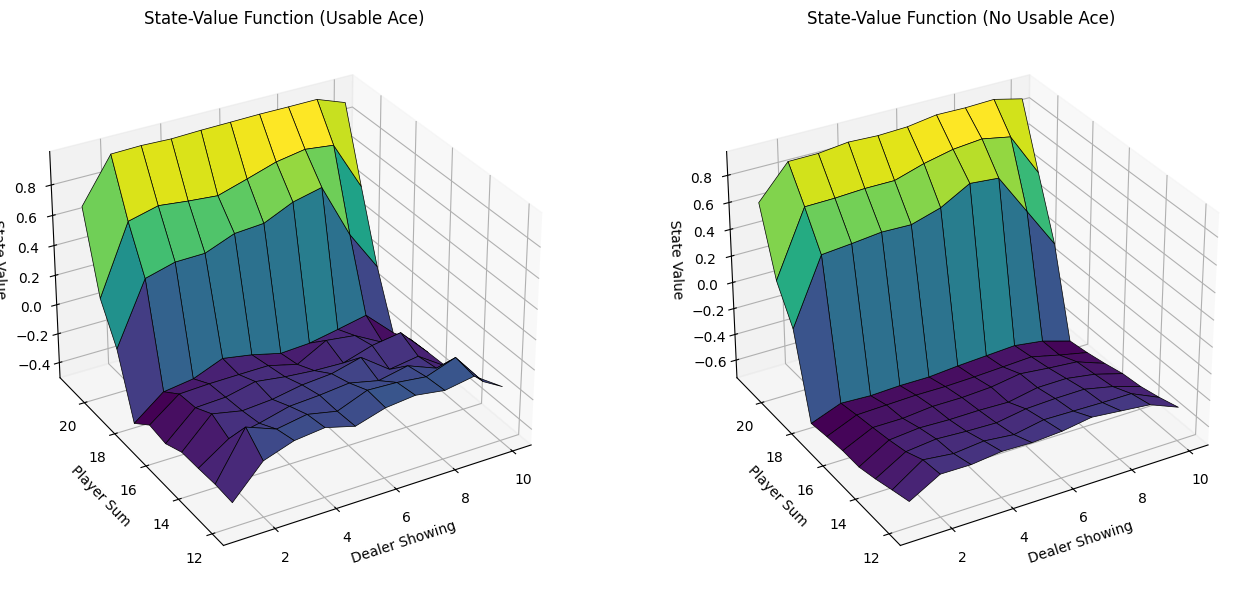

In [94]:
#--- Your code here ---#

def first_visit_mc_prediction(num_games=500000):
    V = np.zeros((10, 10, 2))
    N = np.zeros((10, 10, 2))

    env = gym.make('Blackjack-v1', natural=False, sab=True, render_mode=None)

    for _ in range(num_games):
        
        observation, info = env.reset()
        episode = []
        terminated = False

        while not terminated:
            state = observation
            action = player_policy(state)
            episode.append((state, action))
            observation, reward, terminated, truncated, info = env.step(action)

        G = reward
        seen_states = set()
        
        for state, action in episode:
            player_sum, dealer_card, usable_ace = state
            
            if 12 <= player_sum <= 21:
                player_idx = player_sum - 12  
                dealer_idx = dealer_card - 1 
                ace_idx = int(usable_ace)    
                state_idx = (player_idx, dealer_idx, ace_idx)

                if state_idx not in seen_states:
                    seen_states.add(state_idx)
                    N[state_idx] += 1
                    V[state_idx] += (G - V[state_idx]) / N[state_idx]

    env.close()
    return V

def plot_state_values(V):
    player_sums = np.arange(12, 22)  
    dealer_showing = np.arange(1, 11)  
    X, Y = np.meshgrid(dealer_showing, player_sums)
    
    Z_usable_ace = V[:, :, 1]
    Z_no_usable_ace = V[:, :, 0]
    
    fig = plt.figure(figsize=(14, 6))

    ax1 = fig.add_subplot(121, projection='3d')
    surf1 = ax1.plot_surface(X, Y, Z_usable_ace, cmap='viridis', edgecolor='k', linewidth=0.5)
    ax1.set_title('State-Value Function (Usable Ace)')
    ax1.set_xlabel('Dealer Showing')
    ax1.set_ylabel('Player Sum')
    ax1.set_zlabel('State Value')
    ax1.view_init(elev=30, azim=-120)
   
    ax2 = fig.add_subplot(122, projection='3d')
    surf2 = ax2.plot_surface(X, Y, Z_no_usable_ace, cmap='viridis', edgecolor='k', linewidth=0.5)
    ax2.set_title('State-Value Function (No Usable Ace)')
    ax2.set_xlabel('Dealer Showing')
    ax2.set_ylabel('Player Sum')
    ax2.set_zlabel('State Value')
    ax2.view_init(elev=30, azim=-120)

    plt.tight_layout()
    plt.show()

V = first_visit_mc_prediction()
plot_state_values(V)

## Part II
1. Use the previous policy (sticks if the player’s sum is 19, 20, or 21, and otherwise hits) as the initial policy and find (i) the action-value estimates and (ii) the optimal policy using Monte Carlo with Exploring Starts. To make the starting states with uniform probabilities, pick the dealer’s cards, the player’s sum, and whether or not the player has a usable ace, according to a uniform sampling process. 

*(30)(15) points*


In [106]:

def initial_policy(state):
    player_sum, dealer_card, usable_ace = state
    if player_sum >= 19:
        return 0 
    else:
        return 1 

def monte_carlo_es(num_episodes=500000):
    Q = np.zeros((32, 11, 2, 2))  
    N = np.zeros((32, 11, 2, 2))
    
    policy = np.zeros((32, 11, 2), dtype=int)
    for player_sum in range(32):
        for dealer_card in range(1, 11):
            for usable_ace in [0, 1]:
                state = (player_sum, dealer_card, bool(usable_ace))
                policy[player_sum, dealer_card, usable_ace] = initial_policy(state)
    
    env = gym.make('Blackjack-v1', natural=False, sab=True, render_mode=None)
    
    for episode_num in range(num_episodes):
        observation, info = env.reset()
        terminated = False
        episode = []
        action = np.random.randint(0, 2)  
        state = observation
        episode.append((state, action))
        observation, reward, terminated, truncated, info = env.step(action)
        
        while not terminated:
            state = observation
            player_sum, dealer_card, usable_ace = state
            player_sum = int(player_sum)
            dealer_card = int(dealer_card)
            usable_ace = int(usable_ace)
            action = policy[player_sum, dealer_card, usable_ace]
            episode.append((state, action))
            observation, reward, terminated, truncated, info = env.step(action)
        
        G = reward
        seen_state_actions = set()
        
        for state, action in episode:
            player_sum, dealer_card, usable_ace = state
            player_sum = int(player_sum)
            dealer_card = int(dealer_card)
            usable_ace = int(usable_ace)
            if 12 <= player_sum <= 21 and 1 <= dealer_card <= 10:
                state_action = (player_sum, dealer_card, usable_ace, action)
                if state_action not in seen_state_actions:
                    seen_state_actions.add(state_action)
                    N[player_sum, dealer_card, usable_ace, action] += 1
                    alpha = 1 / N[player_sum, dealer_card, usable_ace, action]
                    Q[player_sum, dealer_card, usable_ace, action] += alpha * (G - Q[player_sum, dealer_card, usable_ace, action])
                    policy[player_sum, dealer_card, usable_ace] = np.argmax(Q[player_sum, dealer_card, usable_ace, :])
    
    env.close()
    return Q, policy






2. Plot the 3D graph of state-value (z-axis), dealer showing (x-axis), player sum (y-axis) for both usable ace and not usable ace states (i.e., you should have two plots) for 500,000 simulated games. Also plot the optimal policy for both the usable ace and not usable ace states for all the player’s sum and dealer showing (i.e., you should have two plots).

*(20)(15) points*

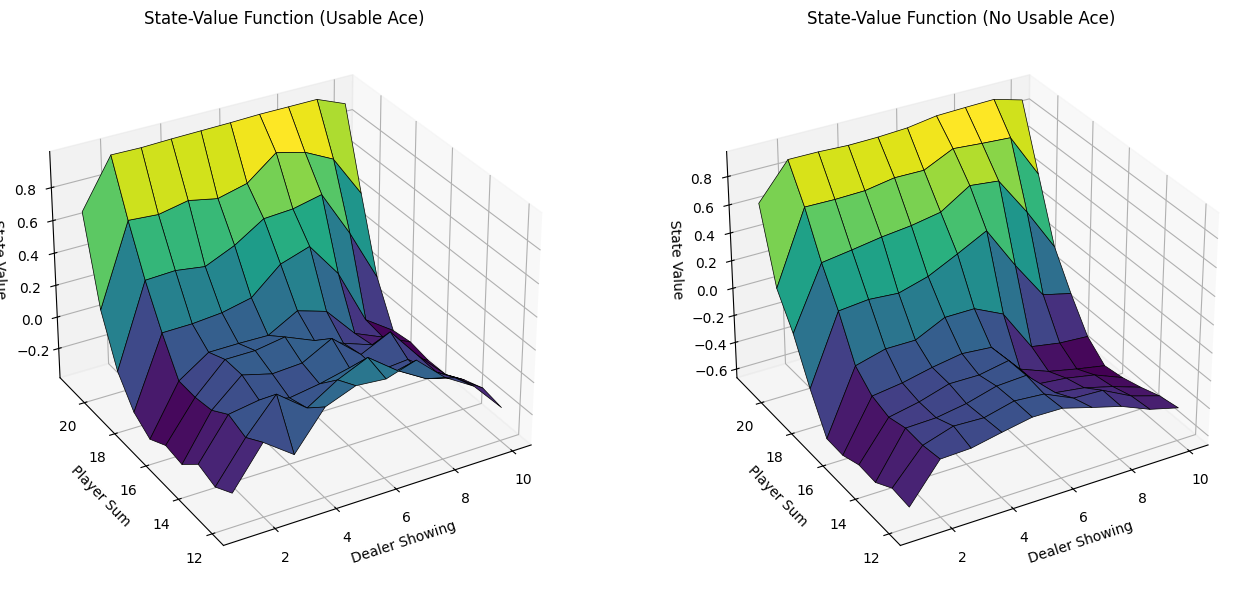

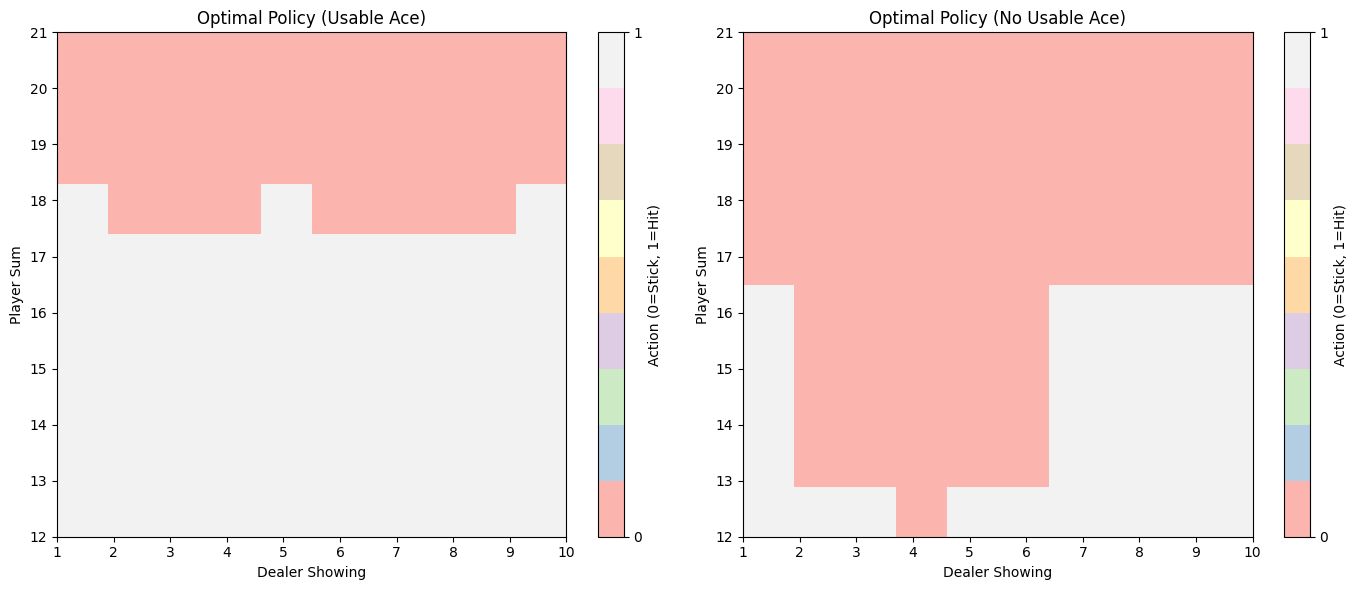

In [108]:
#--- Your code here ---#
def compute_state_values(Q):
    V = np.max(Q, axis=3)
    return V

def plot_state_values(V):
    player_sums = np.arange(12, 22)  
    dealer_showing = np.arange(1, 11)  
    X, Y = np.meshgrid(dealer_showing, player_sums)

    Z_usable_ace = V[12:22, 1:11, 1]  
    Z_no_usable_ace = V[12:22, 1:11, 0]

    fig = plt.figure(figsize=(14, 6))

    ax1 = fig.add_subplot(121, projection='3d')
    surf1 = ax1.plot_surface(X, Y, Z_usable_ace, cmap='viridis', edgecolor='k', linewidth=0.5)
    ax1.set_title('State-Value Function (Usable Ace)')
    ax1.set_xlabel('Dealer Showing')
    ax1.set_ylabel('Player Sum')
    ax1.set_zlabel('State Value')
    ax1.view_init(elev=30, azim=-120)

    ax2 = fig.add_subplot(122, projection='3d')
    surf2 = ax2.plot_surface(X, Y, Z_no_usable_ace, cmap='viridis', edgecolor='k', linewidth=0.5)
    ax2.set_title('State-Value Function (No Usable Ace)')
    ax2.set_xlabel('Dealer Showing')
    ax2.set_ylabel('Player Sum')
    ax2.set_zlabel('State Value')
    ax2.view_init(elev=30, azim=-120)

    plt.tight_layout()
    plt.show()

def plot_policy(policy):
    player_sums = np.arange(12, 22)
    dealer_showing = np.arange(1, 11)

    policy_usable_ace = np.zeros((10, 10))
    policy_no_usable_ace = np.zeros((10, 10))

    for i, player_sum in enumerate(player_sums):
        for j, dealer_card in enumerate(dealer_showing):
            policy_usable_ace[i, j] = policy[player_sum, dealer_card, 1]
            policy_no_usable_ace[i, j] = policy[player_sum, dealer_card, 0]

    fig = plt.figure(figsize=(14, 6))

    ax1 = fig.add_subplot(121)
    cax1 = ax1.imshow(policy_usable_ace, origin='lower', extent=[1,10,12,21], cmap='Pastel1', aspect='auto')
    ax1.set_title('Optimal Policy (Usable Ace)')
    ax1.set_xlabel('Dealer Showing')
    ax1.set_ylabel('Player Sum')
    ax1.set_xticks(np.arange(1,11))
    ax1.set_yticks(np.arange(12,22))
    plt.colorbar(cax1, ax=ax1, ticks=[0,1], label='Action (0=Stick, 1=Hit)')

    ax2 = fig.add_subplot(122)
    cax2 = ax2.imshow(policy_no_usable_ace, origin='lower', extent=[1,10,12,21], cmap='Pastel1', aspect='auto')
    ax2.set_title('Optimal Policy (No Usable Ace)')
    ax2.set_xlabel('Dealer Showing')
    ax2.set_ylabel('Player Sum')
    ax2.set_xticks(np.arange(1,11))
    ax2.set_yticks(np.arange(12,22))
    plt.colorbar(cax2, ax=ax2, ticks=[0,1], label='Action (0=Stick, 1=Hit)')

    plt.tight_layout()
    plt.show()
    
Q, optimal_policy = monte_carlo_es()

V = compute_state_values(Q)

plot_state_values(V)

plot_policy(optimal_policy)


## Part III (*)
1. Extend your algorithm to the **off-policy Monte Carlo control with weighted importance sampling** and estimate action-values and the target policy. You need to consider an arbitrary soft behavior policy. Plot the 3D graph of state-value (z-axis), dealer showing (x-axis), player sum (y-axis) for both usable ace and not usable ace states (i.e. you should have two plots) for 500,000 simulated games. Also plot the optimal policy for both the usable ace and not usable ace states for all the player’s sum and dealer showing (i.e. you should have two plots).


*(+10)(30)* points



In [110]:
#--- Your code here ---#
def behavior_policy(state):
    return np.random.randint(0, 2)
    
def target_policy(Q, state):
    player_sum, dealer_card, usable_ace = state
    player_sum = int(player_sum)
    dealer_card = int(dealer_card)
    usable_ace = int(usable_ace)
    return np.argmax(Q[player_sum, dealer_card, usable_ace, :])

def off_policy_mc_control(num_episodes=500000):
    Q = np.zeros((32, 11, 2, 2))  
    C = np.zeros((32, 11, 2, 2)) 
    
    policy = np.zeros((32, 11, 2), dtype=int)
    
    env = gym.make('Blackjack-v1', natural=False, sab=True, render_mode=None)
    
    for episode_num in range(num_episodes):
        episode = []
        observation, info = env.reset()
        terminated = False
        
        while not terminated:
            state = observation
            action = behavior_policy(state)
            episode.append((state, action))
            observation, reward, terminated, truncated, info = env.step(action)
        
        G = reward  
        W = 1.0 
        
        for t in reversed(range(len(episode))):
            state_t, action_t = episode[t]
            player_sum, dealer_card, usable_ace = state_t
            player_sum = int(player_sum)
            dealer_card = int(dealer_card)
            usable_ace = int(usable_ace)
            state_idx = (player_sum, dealer_card, usable_ace)
            action_idx = action_t
            C[player_sum, dealer_card, usable_ace, action_idx] += W
            Q[player_sum, dealer_card, usable_ace, action_idx] += (W / C[player_sum, dealer_card, usable_ace, action_idx]) * (G - Q[player_sum, dealer_card, usable_ace, action_idx])
            policy[player_sum, dealer_card, usable_ace] = np.argmax(Q[player_sum, dealer_card, usable_ace, :])
            if action_idx != policy[player_sum, dealer_card, usable_ace]:
                break 
            b_prob = 0.5  
            W = W * (1.0 / b_prob)
    
    env.close()
    return Q, policy


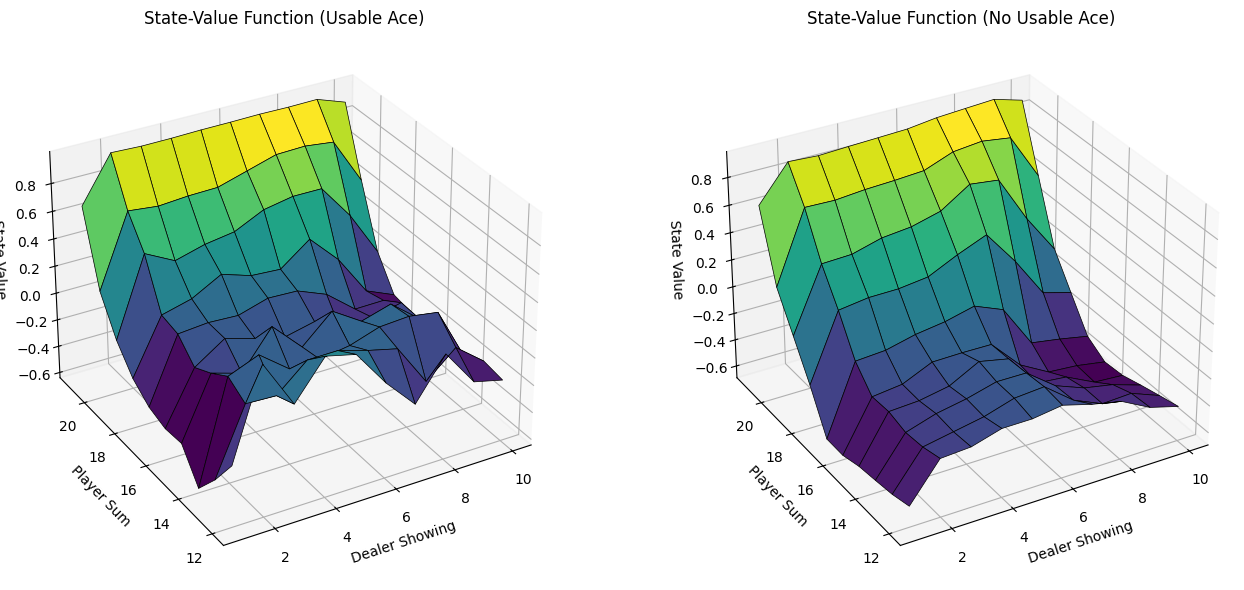

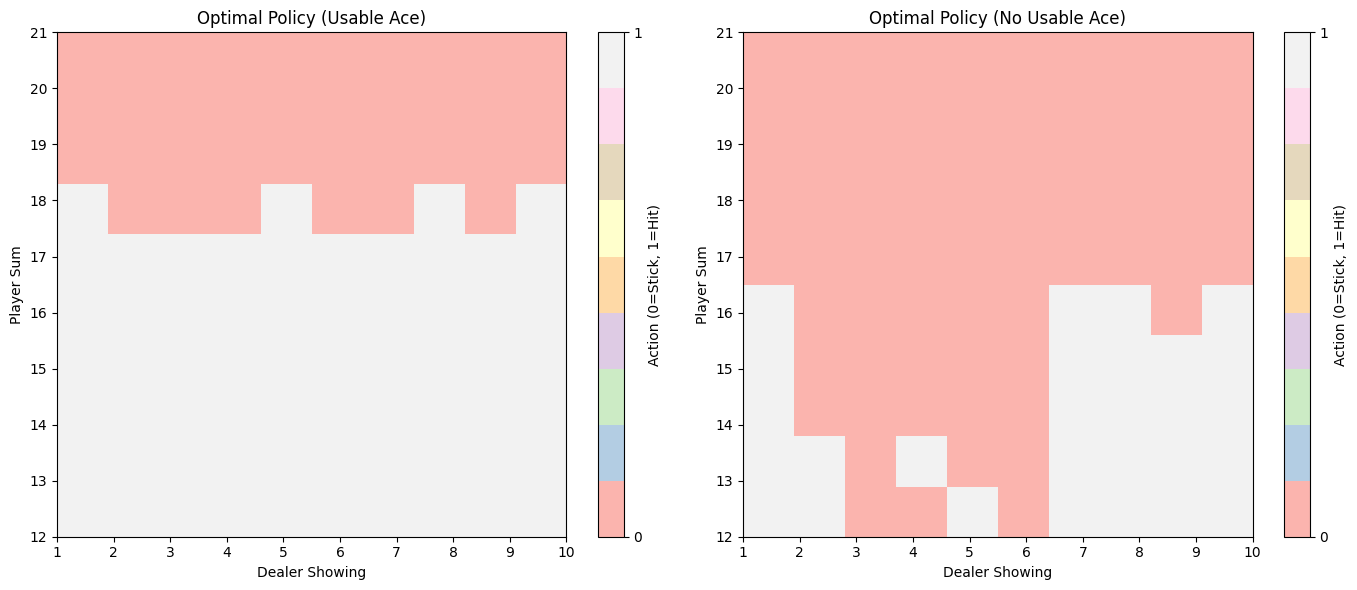

In [111]:
Q, policy = off_policy_mc_control(num_episodes=500000)

V = compute_state_values(Q)

plot_state_values(V)

plot_policy(policy)

2. Answer the following questions:

a.	What behavior policy did you select? Why does it make sense?
> Answer
As my behavior policy, I chose a uniformly random policy where probability of selecting each action in every state is equal. It helps by ensuring exploration of all actions, also as each action has a probability of 0.5 this helps and simplifies calculation of Importance sampling ratio. Uniform random behavior keeps the implementation straightforward and successfully avoids learning bias.

b.	How does the obtained target policy in this part compare to the target policies in parts I and II? Is it different? Why? 
> Answer
In part I of this homework we implemented first visit MC prediction on a fixed policy we estimated the state value functions for our policy since we did not change or improve policy the the target policy remained the same i.e. if the player's sum is less than 19 we hit,else we stick. Then in part II we implemented MC witg exploring starts, we used our first policy as initial policy and then updated it greedily with action value estimates. So we ended up with a better policy iteratively and slowly converging towards optimal policy via On-policy learning.
Now in this last part we implemented Off-policy MC control with weighted importance sampling, we selected uniform random policy as our behavior and then updated target policy greedily as we did in part II. The target policy was the off policy that we learned from the episodes generated by our random behavior. There is difference between how we learn here as the target policy is learnt independently unlike on policy, where both target and initial policy evolve together. Here also because of our behavior policy being so different from optimal policy its slower to converge because of variance. Whereas, in case of on policy our initial policy helps us converge faster. Also from our results we can see the difference in their policies for different states. As we increase the number of episodes we run both programs for, they should both converge to the same optimal policy.(To demonstrate that they converge to optimal policy, below I have run both of them for 5000000 and 6000000 iterations respectively.)

*(+10)(10) points*

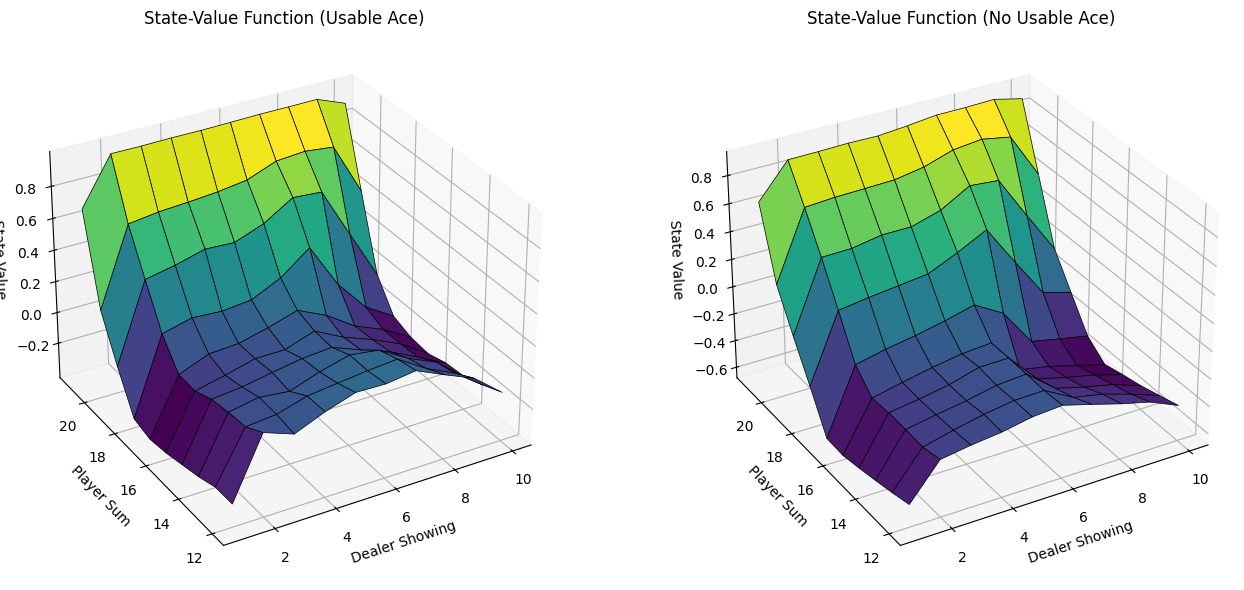

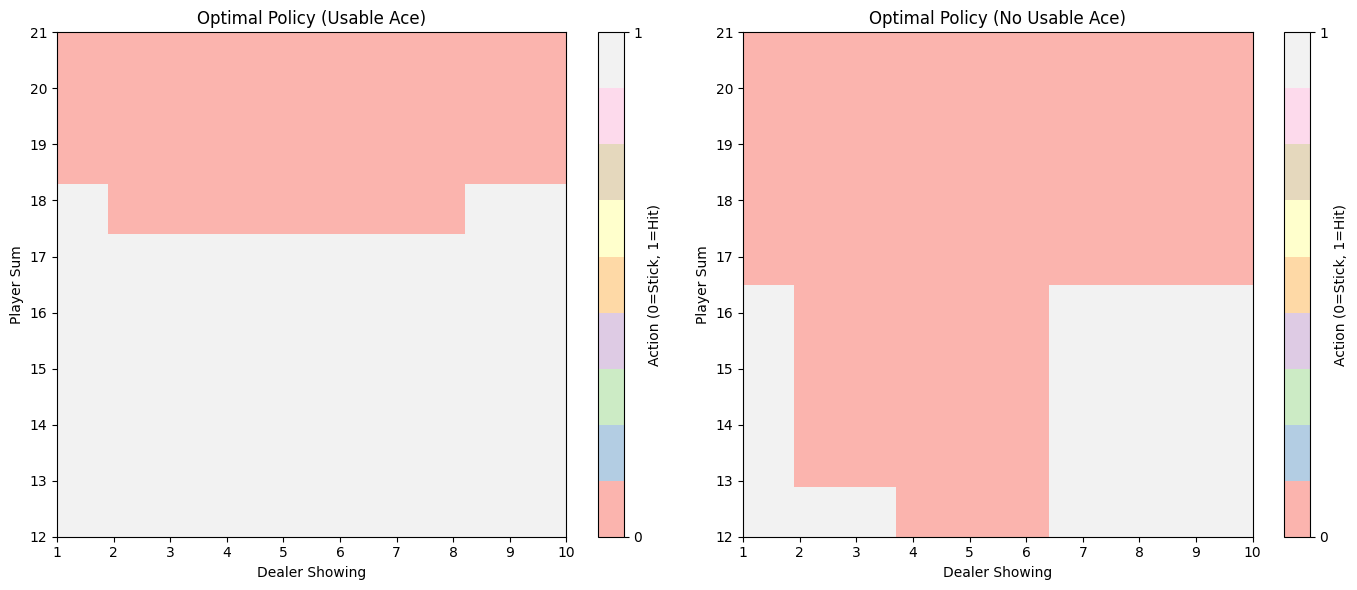

In [113]:
#Here are the results of MC ES after 5000000 iterations
Q, optimal_policy = monte_carlo_es(5000000)

V = compute_state_values(Q)

plot_state_values(V)

plot_policy(optimal_policy)

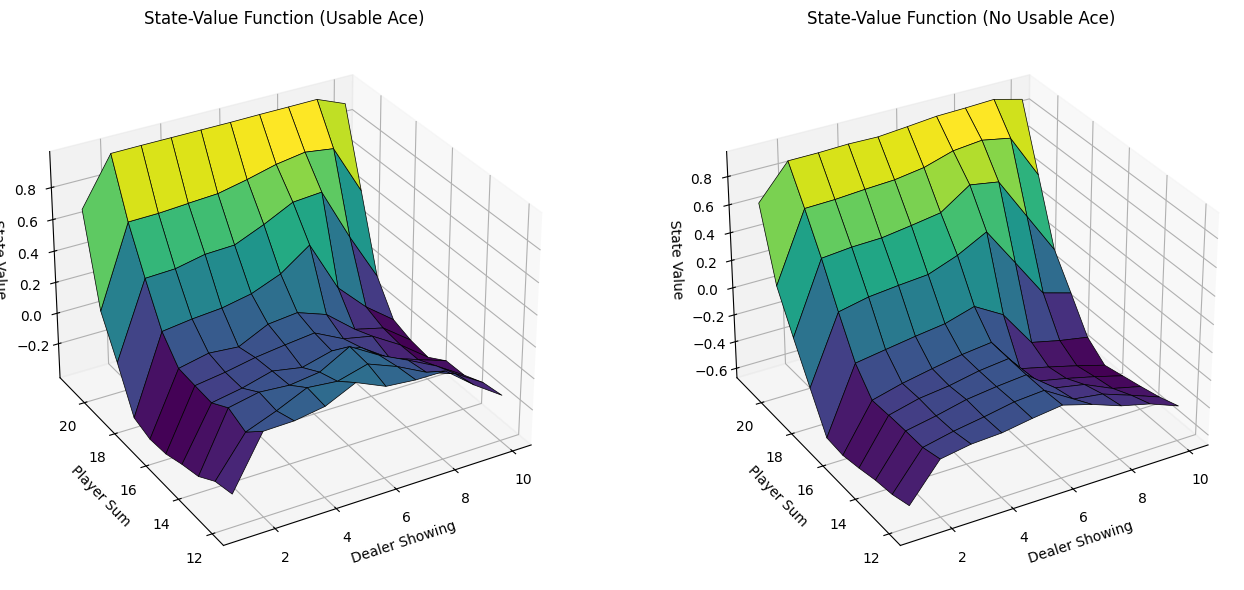

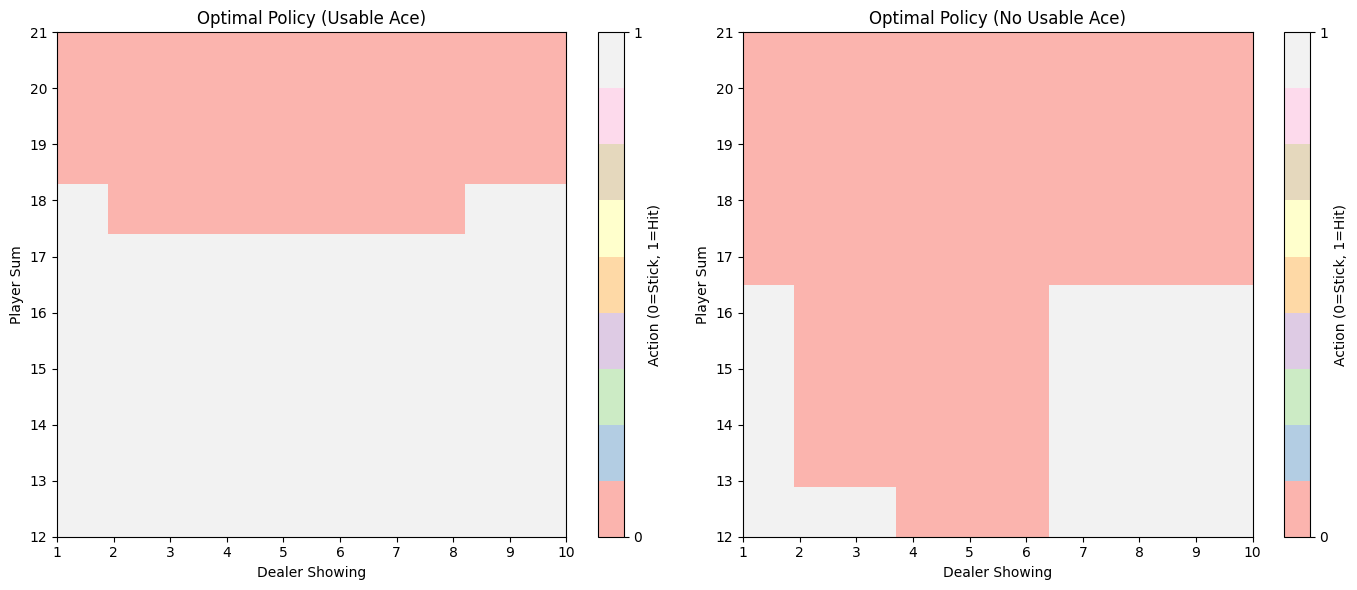

In [121]:
#Here are the results of off-policy MC control after 6000000 iterations
Q, policy = off_policy_mc_control(6000000)

V = compute_state_values(Q)

plot_state_values(V)

plot_policy(policy)